# Project: Prediction Keeping Reservations Of Diagnosis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>In this project, I will be analyzing data associated with people in Brazil coming to hospitals. <br>
In particular, I am intrested in finding trends among the patients who actually came to their hospitals after making reservations, and how they are different from the patients who did not come.

>And in the data set I will be analyzing, there are several columns that checks if the patients got specific popular diseases, Hipertension, Diabetes, Alcoholism and Handicap. I will use the words like 'specific sickness' below, and it means these diseases.<br><br>
Here, I want to post some questions below, which I will be analyzing.

### The correlations that I want to analyze<br>
<ol>
**
    <li><a href="#one">Age and Appointment Day</a></li>
    <li><a href="#two">Age and Presence</a></li>
    <li><a href="#three">Appointment Day and Presence</a></li>
    <li><a href="#four">SMS Receiver and Presence</a></li>
    <li><a href="#five">Sickness or Health</a></li>
    <li><a href="#six">Scholarship and Presence</a></li>
    <li><a href="#seven">Those Who Apply All</a></li>
**
</ol>

<a id='wrangling'></a>
## Data Wrangling
In this section, I will check and clean up the data.

### General Properties
>First, I will read the data set and check data types of each columns.<br>
>Then check a couple of concrete details of data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.info()

# Check the exact data type of 'object'
type(df['Gender'][0]), type(df['ScheduledDay'][0]), type(df['AppointmentDay'][0]), type(df['Neighbourhood'][0]), type(df['No-show'][0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(str, str, str, str, str)

In [4]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


### Data Cleaning
>I could check brief information of this data set.<br>
Looking at the data above, I can remove few columns because it will not be useful for this analyze.<br>
I chose these three columns as not needed, **PatientId**, **AppointmentID**, and **Neighbourhood**.</i><br><br>
And also, I can change few column names that are incorrect or can be better for use.<br>
I will rename **Handcap** to **Handicap**, and **No-show** to **NoShow**.
<br>

>Thus what I will do next is<br>
**・Remove columns<br>
・Change columns name**

In [5]:
#Remove columns
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

#Rename columns
df = df.rename(columns = {'No-show': 'NoShow', 'Handcap': 'Handicap'})

df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No


>I could delete unnecessary columns and rename few columns correctly.<br>
Now I think in this data set there might be some duplicated data. And if there are, I need to delete them.

>Thus what I will do next is<br>
**・Check and Delete duplicated data**

In [6]:
df.duplicated().sum()

722

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

>Now I could delete duplicated data.<br><br>
At this point, I think I need to create a new column that shows the number of days between *ScheduledDay* and *AppointmentDay*.<br>
Let's make that with name **IntervalDay**<br>

>Thus what I will do next is<br>
**・Create a new column**

In [8]:
# First, make a copy dataset and change specific columns' data.
# change datetime data to only Year-Month-Day.

copy = df.copy()

copy['ScheduledDay'] = copy['ScheduledDay'].astype(str)
copy['ScheduledDay'] = copy['ScheduledDay'].apply(lambda x: x.split('T')[0])

copy['AppointmentDay'] = copy['AppointmentDay'].astype(str)
copy['AppointmentDay'] = copy['AppointmentDay'].apply(lambda x: x.split('T')[0])

copy.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No


In [9]:
# Second, Create a new column and insert it to the copy dataset.

copy['ScheduledDay'] = pd.to_datetime(copy['ScheduledDay'])
copy['AppointmentDay'] = pd.to_datetime(copy['AppointmentDay'])

DayInterval = copy['AppointmentDay'] - copy['ScheduledDay']
copy.insert(3, 'DayInterval', DayInterval)

copy.head(1)

,Gender,ScheduledDay,AppointmentDay,DayInterval,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,F,2016-04-29,2016-04-29,0 days,62,0,1,0,0,0,0,No


In [10]:
# Third, change the data type of the new data set to int.
#To do that, extract only numbers in each data.

copy['DayInterval'] = (copy['DayInterval'] / np.timedelta64(1, 'D')).astype(int)

copy.head(1)

,Gender,ScheduledDay,AppointmentDay,DayInterval,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,F,2016-04-29,2016-04-29,0,62,0,1,0,0,0,0,No


In [11]:
#Fourth, apply edited dataset to the original one.

df.drop(df.index, inplace=True)
df = df.append(copy)
df.head(1)

,Age,Alcoholism,AppointmentDay,DayInterval,Diabetes,Gender,Handicap,Hipertension,NoShow,SMS_received,ScheduledDay,Scholarship
0,62,0,2016-04-29,0.0,0,F,0,1,No,0,2016-04-29,0


In [12]:
#Last, order the columns as original one.

cols = ['Gender','ScheduledDay','AppointmentDay','DayInterval','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handicap','SMS_received','NoShow']
df = df[cols]

#And change data type from float to int
df.DayInterval = df.DayInterval.astype(int)

df.head(1)

,Gender,ScheduledDay,AppointmentDay,DayInterval,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,F,2016-04-29,2016-04-29,0,62,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

>Now that I have trimmed and cleaned the data, I am ready to move on to exploration. <br>
I will compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.<br>
I will follow it up by looking at relationships between variables.

### Grasp The Overall

>Before I start analyzing each questions, let me understand overall of the dataset first.<br>
I will look at data according to the descriptive statistics.

In [13]:
df.describe()

,DayInterval,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,109805.000000,109805.000000,109805.000000,109805.000000,109805.000000,109805.000000,109805.000000,109805.000000
mean,10.164865,37.105205,0.098347,0.197386,0.071882,0.030454,0.022148,0.323118
std,15.254650,23.120722,0.297785,0.398028,0.258294,0.171834,0.160941,0.467670
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id="one"></a>
### 1. Age and Appointment Day
> I will separate the dataset into two to investigate the difference. <br>
One is for the people made reservations on that day, and another is 1day before or more.

In [14]:
#Separate the dataset.
that_day = df.query("DayInterval == 0")
previous_day = df.query("DayInterval != 0")

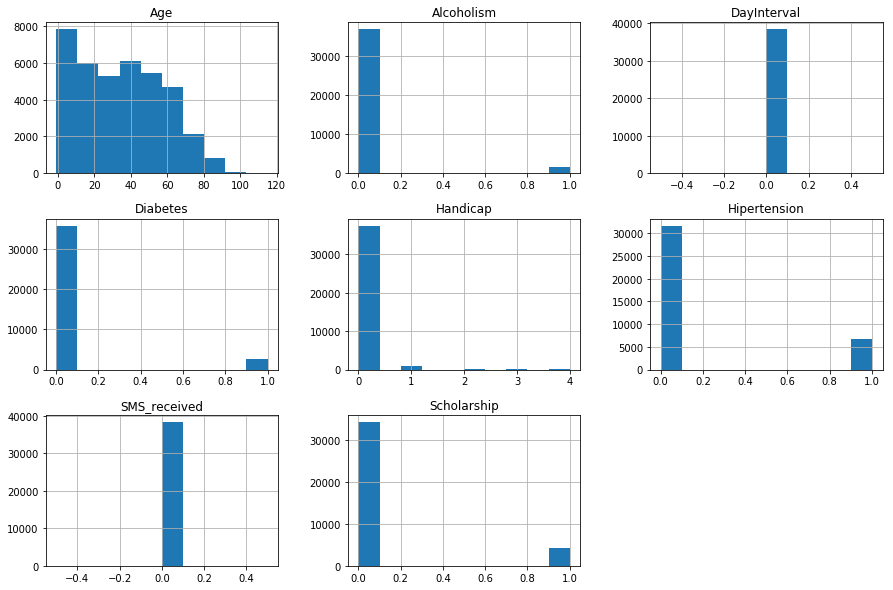

In [15]:
#Display all histogram of each dataset.
that_day.hist(figsize=(15,10));

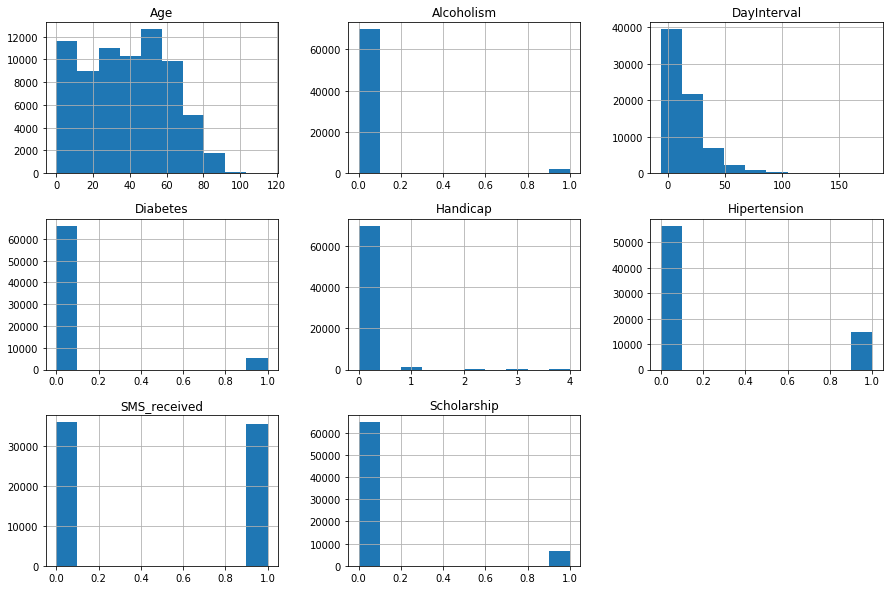

In [16]:
previous_day.hist(figsize=(15,10));

>Looking at the histograms above, there seem to be several differences.<br>
**Age**, **DayInterval**(definitely), and **SMS_received** histograms.<br><br>
Let's see proportion of patients age separated by appointment day in histograms first.

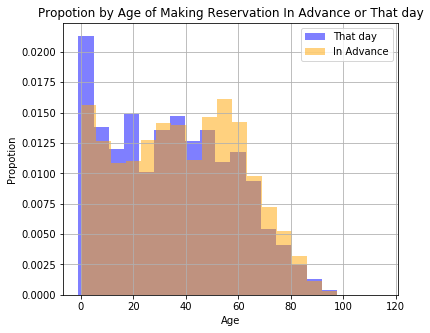

In [17]:
that_day.Age.hist(figsize=(6,5), bins=20, density=True, color='blue', alpha=0.5, label='That day')
previous_day.Age.hist(figsize=(6,5), bins=20, density=True, color='orange', alpha=0.5, label='In Advance')

plt.title('Propotion by Age of Making Reservation In Advance or That day')
plt.xlabel('Age')
plt.ylabel('Propotion')
plt.legend();

>It shows young age(especially 0-20 years old) make reservations of diagnosis on that day,<br>
and senior age(especially 50-100 years old) tend to do in advance.

<a id="two"></a>
### 2. Age and Presence
>In this section, I will check if age difference causes proportion of presence.<br>
According to the result above, the mean age of the patients is about **37**.<br>
So separating the dataset again, with a boundary of the age mean.

In [18]:
# Separate the dataset into two, more than the mean of  age and less than that.

first_age = df[df['Age'] < df['Age'].mean()]
second_age = df[df['Age'] >= df['Age'].mean()]

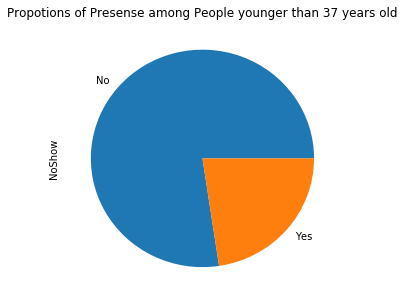

In [19]:
# Then, display each proportion by pie chart.
# The reanson why I chose this type of chart is just this is my taste.

first_age.NoShow.value_counts().plot(kind='pie', figsize=(5, 5))
plt.title('Propotions of Presense among People younger than 37 years old');

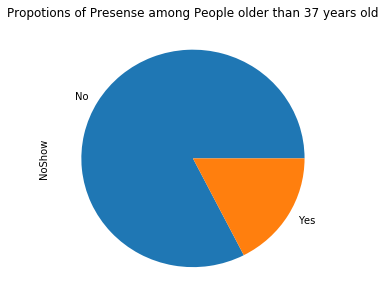

In [20]:
second_age.NoShow.value_counts().plot(kind='pie', figsize=(5, 5))
plt.title('Propotions of Presense among People older than 37 years old');

>Comparing with these two pie chart, people below 37 years old tend to be absent from the hospital, slightly.

<a id="three"></a>
### 3. Appointment Day and Presence

>For now, I checked the correlation of `Age and Appointment Day` and `Age and Presence`.<br>
Then how is the relationship of `Appointment Day and Presence`?<br><br>
To do this, let's separate the dataset for now, those who made appointment on that day or not.

>From here, these variables will be used for many times to display good bar charts.<br>
I will show here separatedly for easy checking back.

In [21]:
#They will be used a lot for discribing charts.
ind = np.arange(2)
width = 0.25
width2 = width+0.01

>Now let's start the analyzing.

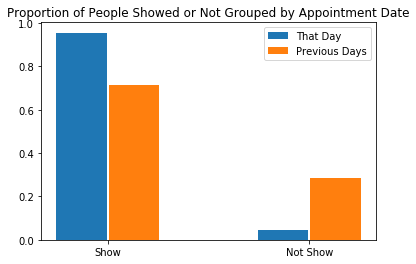

In [22]:
# First, separate dataset. Those who made appointments on that day or not.

that = that_day.NoShow.value_counts() / that_day.shape[0]
previous = previous_day.NoShow.value_counts() / previous_day.shape[0]

plt.bar(ind, that,width, label='That Day')
plt.bar(ind+width+0.01, previous, width, label='Previous Days')
locations = ind+width2 / 2

label = ['Show', 'Not Show']
plt.xticks(locations, label)
plt.title('Proportion of People Showed or Not Grouped by Appointment Date')

plt.legend();

>It might be natural, but those who made appointments on that day are less absent from the hospital.<br>
And people made appointments before that day are absent more.<br>
I guess it is simply because the latter forgot the appointment.


>If the problem is if they forgot it or not, those who made appointments on that day are less likely to do that.<br>
So next, focus on only people made reservation 1day before or more, and separate this group by mean of days before diagnosis day.

In [23]:
# Extract the data except the people made reservation on that day.
#And check the max value.(min is 1)

before_day = df.query('DayInterval >= 1')
before_day.DayInterval.max()

179

>A person made appointment **179days** before in advance...<br>
That would influence the mean, so let's take the median of IntervalDay.

In [24]:
before_day.DayInterval.median()

9.0

>This value is understandable. I will separate the dataset IntervalDay is more than 9days or less.<br>
And then, calculate the proportion of each dataset, whether they showed or not.

In [25]:
#Separate the dataset and calculate the proportion.

short = before_day.query('1<= DayInterval <= 9')
long = before_day.query('DayInterval > 9')

short_show = short.groupby('NoShow').count()['Age']
short_count = short.count()['Age']

long_show = long.groupby('NoShow').count()['Age']
long_count = long.count()['Age']

short_proportions = short_show / short_count
long_proportions = long_show / long_count

>Finally, visualize their data as bar charts.

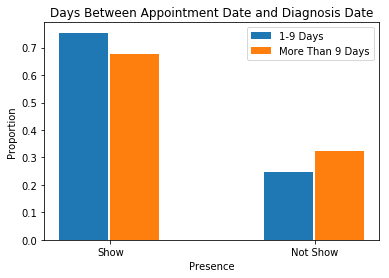

In [26]:
# Display the result as bar chart.

short_bars = plt.bar(ind, short_proportions, width-0.01, label='1-9 Days')
long_bars = plt.bar(ind + width, long_proportions, width-0.01, label='More Than 9 Days')

plt.ylabel('Proportion')
plt.xlabel('Presence')
plt.title('Days Between Appointment Date and Diagnosis Date')
labels = ['Show', 'Not Show']
plt.xticks(locations, labels)

plt.legend();

>This shows people made reservation before more than 9days did not show more than bofore 9days.

<a id="four"></a>
### 4. SMS Receiver and Presence
>In this section, I will see how presence rate will differ by if people receive SMS or not.<br>
As I guess, if the problem of not showing is just forgetting, SMS can prevent us from that.

>As well, separate the dataset if people receive SMS or not first, and check the proportion.

In [27]:
#Separate the dataset if getting SMS or not.

sms = df.query("SMS_received == 1")
no_sms = df.query("SMS_received == 0")

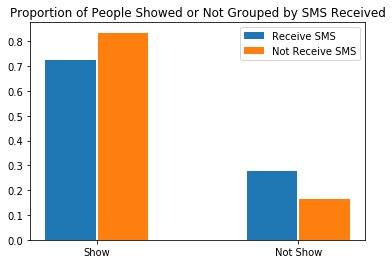

In [28]:
#Calculating the each proportions and show them.

sms_receive = sms.NoShow.value_counts() / sms.shape[0]
nosms_receive = no_sms.NoShow.value_counts() / no_sms.shape[0]

plt.bar(ind, sms_receive,width, label='Receive SMS')
plt.bar(ind+width+0.01, nosms_receive, width, label='Not Receive SMS')
label = ['Show', 'Not Show']
plt.xticks(locations, label)
plt.title('Proportion of People Showed or Not Grouped by SMS Received')
plt.legend();

>Surprisingly, people did not get the SMS came hospitals more than those who got them! But it looks weird.<br>
Looking back to <a href="#one">the graph of making appointment on that day or not</a>, it turned out that SMS was not sent to that-day-people.<br>
So let's calculate again except them.

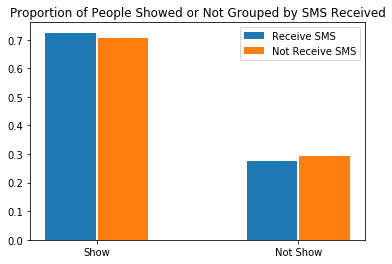

In [29]:
true_no_sms = no_sms.query('DayInterval >=1')
true_no_sms_receive = true_no_sms.NoShow.value_counts() / true_no_sms.shape[0]

plt.bar(ind, sms_receive,width, label='Receive SMS')
plt.bar(ind+width+0.01, true_no_sms_receive, width, label='Not Receive SMS')
label = ['Show', 'Not Show']
plt.xticks(locations, label)
plt.title('Proportion of People Showed or Not Grouped by SMS Received')
plt.legend();

>The result changed to reasonable one.<br>
By this, Those who received SMS are less absent than those who did not.<br>
But because this is very little bit difference, it is not sure SMS can influence the presence rate.

<a id="five"></a>
### 5. Sickness or Health

>Next, I will focus on if patients had specific sick or not.<br>
What characteristics the sick people have, or do they come the hospital more than the health, etc.<br>
And see how gender matters as well.

>First, separate the dataset. One is for the sick, another for the health.

In [30]:
sick = df.query('Hipertension == 1or Diabetes == 1or Alcoholism == 1 or Handicap == 1')
health = df.query('Hipertension == 0 and Diabetes == 0 and Alcoholism == 0 and Handicap == 0')

>Then, see the each histogram of age.

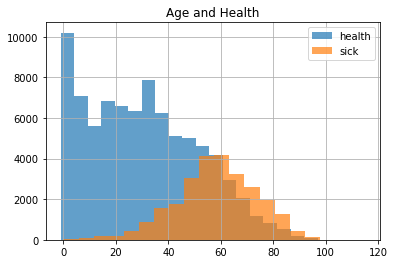

In [31]:
health.Age.hist(label='health', bins=20, alpha=0.7)
sick.Age.hist(label='sick', bins=20, alpha=0.7)
plt.title('Age and Health')
plt.legend();

>It shows the older they are, they have some specific disease.<br>
In this data, I defined sick people as people have one specific disease or more.

>Next, check the presence rate of sick people and health people.

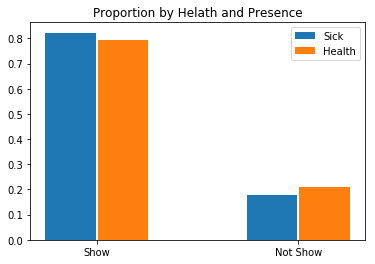

In [32]:
sick_show = sick.NoShow.value_counts() / sick.shape[0]
health_show = health.NoShow.value_counts() / health.shape[0]
plt.bar(ind, sick_show, width, label='Sick')
plt.bar(ind+width2, health_show, width, label='Health')
plt.xticks(locations, label)
plt.title('Proportion by Helath and Presence')
plt.legend();

>The sick people come to the hospital more than the health people.<br>
I guess it is because they came to heal their sickness.

>At this point, I want to check gender rate of this dataset.

In [33]:
df.Gender.value_counts()

F    71389
M    38416
Name: Gender, dtype: int64

>In this dataset, the gender proportion is **Female : Male = 7 : 3**.<br>
When simply looking at this result, female go to see a doctor more than male.<br>
In Brazil, do wemen tend to get sick more than men by any chance? Let's check it out.

>I will focus on the sick people group by gender, and whole dataset as well.

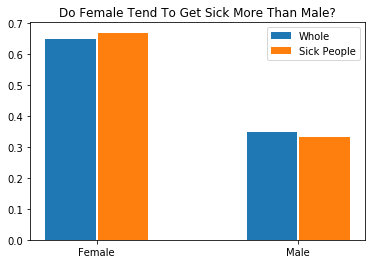

In [34]:
whole = df.groupby('Gender').count()['Age'] / df.shape[0]
sick_people = sick.groupby('Gender').count()['Age'] / sick.shape[0]

plt.bar(ind, whole, width, label='Whole')
plt.bar(ind+width+0.01, sick_people, width, label='Sick People')
label=['Female', 'Male']
plt.xticks(locations, label)
plt.title('Do Female Tend To Get Sick More Than Male?')
plt.legend();

>According to the data above, wemen have a little bit more proportion of sick than male.<br>
There might be something, but the difference is very small.<br>
I want to conclude the reason why wemen came to the hospitals more is because they are more careful about their own health than male.

<a id="six"></a>
### 6. Scholarship and Presence
>In Brazil, there is a living protection benefit system for the poor. That name is **Bolsa Familia**.<br>
In this dataset 'Scholarship' column means if people took this benefit system or not.<br>

>So I will see how difference there is between those who took this system and those who not.

In [35]:
scholar = df.query('Scholarship == 1')
non_scholar = df.query('Scholarship == 0')

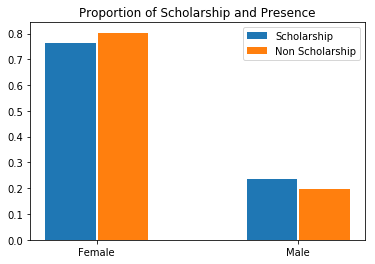

In [36]:
# Check presence rate by taking scholarship or not.

scholar_show = scholar.NoShow.value_counts() / scholar.shape[0]
non_scholar_show = non_scholar.NoShow.value_counts() / non_scholar.shape[0]

plt.bar(ind, scholar_show, width, label='Scholarship')
plt.bar(ind+width2, non_scholar_show, width, label='Non Scholarship')

plt.title('Proportion of Scholarship and Presence')
plt.xticks(locations, label)
plt.legend();

>People who do not take the scholarship tend to come to the hospitals, while the scholarship people do not slightly.<br>
Is it because by getting money by Bolsa Familia, their living standard got better, and they got room in their mind to skip the reservations?<br> 
I am not sure the truth... But I chose this is the reason.

<a id="seven"></a>
### 7. Those Who Apply All

>This is the last question from me.<br>
For now Investigated six queries, I found there were some differences and most of them were small ones.<br>
But I am sure they have a power of pretending the feature of patients come their diagnosis day or not.<br><br>
In this section, I want to check the presence rate of the people who showed 'Not Show' in all six analyzing above.<br>
I think if this data showed bigger difference compared to the whole dataset, it could be a clue of prediction.

In [37]:
# Extract the data that apply less presence in all six analyzing above.
apply_all = health.query('Gender == "M" and SMS_received == 0 and DayInterval >= 4 and Age <= 37 and Scholarship == 1')

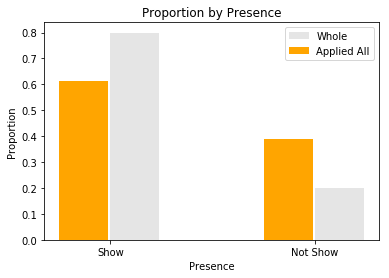

In [38]:
#Display the data comparing to the whole dataset.

whole_data = df.NoShow.value_counts() / df.shape[0]
conclusion = apply_all.NoShow.value_counts() / apply_all.shape[0]

plt.bar(ind + width, whole_data, width-0.01, label='Whole', color='gray', alpha=0.2)
plt.bar(ind, conclusion, width-0.01, label='Applied All', color='orange')

plt.ylabel('Proportion')
plt.xlabel('Presence')
plt.title('Proportion by Presence')
labels = ['Show', 'Not Show']
plt.xticks(locations, labels)

plt.legend();

In [40]:
#The proportion of orange data
apply_all.NoShow.value_counts() / apply_all.shape[0]

No     0.61165
Yes    0.38835
Name: NoShow, dtype: float64

>Almost **39%** patients did not come to the hospitals!<br>
Because the 'Not Show' proportion of the whole data is about **20%**, I can say this **19%** difference is big one.

<a id='conclusions'></a>
## Conclusions

>In my research, people who apply below contents have high probability to be absent from the hospital even if they made reservations.
><ul>
    <li>Male</li>
    <li>Not SMS receiver</li>
    <li>Made reservation 9days or more before diagnosis</li>
    <li>Health</li>
    <li>Under 37 years old</li>
    <li>Take Scholarship 'Bolsa Familia'</li>
</ul>
And the absent rate of the people who apply all of above was 39%, compared to the whole data showed 20%.

Regarding these result, I guessed several things below.<br>
It is hard to judge why people got Bolsa Familia tend not to come to the hospital, but it might be because they got room in their mind by getting their living standard better.
And I guess showing hospital rate could be better if the hospitals reccomend to make reservations within 9days and to receive SMS more. The SMS receiver was defined people who got SMS once or more, but I wonder how often that messages would be sent. Maybe they should think again when to send SMS because it does not work so far. Also, I wanted to know the information about if the patients have their smart phone or not. It means I thought I need to know some information about people who do not have their phone, if they wanted to have.<br><br>
I can not give some causations by those analyzing, but it is sure that:<br>
**People who are male, do not receive SMS, health, under 37 years old, and got Bolsa Familia, have comparatively high probability of not showing that day of diagnosis.**